<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# Classification Evaluation Lab
Week 4 | Lab 1.4
***

The goal of our first classifcation evaluation lab is to understand working with the common tools and methods we use when we evaluate prediction in terms of classification.  Also, we will explore the possibility of engineering features with continious variables, that can be used for classifcation.

In [104]:
import pandas as pd, numpy as np
import patsy

%matplotlib inline

In [105]:

def accuracy_crossvalidator(X, Y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = Y[train_i]
        Y_test = Y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))



## Load the "Sacramento Realestate Transactions" housing dataset

In [106]:
df = pd.read_csv("/Users/tlee010/desktop/dsi-sf-2-timdavidlee/datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")

In [107]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 1. Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [108]:
df['target_200'] = df['price'].map(lambda x: 1 if x > 200000 else 0)
df['target_100'] = df['price'].map(lambda x: 1 if x > 100000 else 0)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,target_200,target_100
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0


### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!

In [109]:
formula = 'target_200 ~ beds + baths + sq__ft-1'
y, x = patsy.dmatrices(formula,data=df,return_type ="dataframe")
formula = 'target_100 ~ beds + baths + sq__ft-1'
y2, x2 = patsy.dmatrices(formula,data=df,return_type ="dataframe")

### 3. Load your design matrix.  Split your data into training and testing sets.  Setup KNN.

The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created. Make the test size 33% (and optionally stratify).

> _Research the stratify parameter.  Why could this be important?_

In [58]:
# x_train2, x_test2, y_train2, y_test2 = tts(x2,y2,test_size = 0.33)
# x_train3, x_test3, y_train3, y_test3 = tts(x2,y2,test_size = 0.33, stratify=y)

# print type(x_train3), x_train3.shape, type(x_train2), x_train2.shape
# print type(y_train3), y_train3.shape, type(y_train2), y_train2.shape

<class 'pandas.core.frame.DataFrame'> (659, 3) <class 'pandas.core.frame.DataFrame'> (659, 3)
<class 'pandas.core.frame.DataFrame'> (659, 1) <class 'pandas.core.frame.DataFrame'> (659, 1)


In [111]:
from sklearn.cross_validation import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.33) 
x_train2, x_test2, y_train2, y_test2 = tts(x2,y2,test_size = 0.33) 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import grid_search, datasets


# from sklearn.cross_validation import StratifiedKFold
# cv_indices = StratifiedKFold(y.values.ravel(), n_folds=3)


# make a blank knn model
knn_blank = KNeighborsClassifier()

search_parameters = {
    'n_neighbors':  [1,3,5,10,20,30,50], 
    'weights':      ['distance', 'uniform']
}

print x.shape, y.shape

# Initialize gridsearch
estimator = grid_search.GridSearchCV(knn_blank, search_parameters, cv=5)

# Fit some data!
results = estimator.fit(x.values, y.values.ravel())

knn_blank2 = KNeighborsClassifier()
estimator2 = grid_search.GridSearchCV(knn_blank2, search_parameters, cv=5)
results2 = estimator2.fit(x2.values, y2.values.ravel())

print results.best_score_
print results.best_params_
# (985, 3) (985, 1)
# 0.734010152284
# {'n_neighbors': 30, 'weights': 'uniform'}


print results2.best_score_
print results2.best_params_

knn_opt = KNeighborsClassifier(n_neighbors = 30, weights = 'uniform')
knn_opt2 = KNeighborsClassifier(n_neighbors = 20, weights = 'distance')

cv_indices = StratifiedKFold(y.values.ravel(), n_folds=10)
cv_indices2 = StratifiedKFold(y2.values.ravel(), n_folds=10)

accuracy_crossvalidator(x.values, y.values.ravel(),  knn_opt, cv_indices)
accuracy_crossvalidator(x2.values, y2.values.ravel(),  knn_opt, cv_indices2)



(985, 3) (985, 1)
0.734010152284
{'n_neighbors': 30, 'weights': 'uniform'}
0.879187817259
{'n_neighbors': 20, 'weights': 'distance'}
('Fold accuracy:', 0.82828282828282829)
('Fold accuracy:', 0.77777777777777779)
('Fold accuracy:', 0.75757575757575757)
('Fold accuracy:', 0.87878787878787878)
('Fold accuracy:', 0.70707070707070707)
('Fold accuracy:', 0.47474747474747475)
('Fold accuracy:', 0.6767676767676768)
('Fold accuracy:', 0.7142857142857143)
('Fold accuracy:', 0.865979381443299)
('Fold accuracy:', 0.60824742268041232)
('Mean CV accuracy:', 0.72895226194195273)
('Fold accuracy:', 0.87)
('Fold accuracy:', 0.89000000000000001)
('Fold accuracy:', 0.86868686868686873)
('Fold accuracy:', 0.81632653061224492)
('Fold accuracy:', 0.87755102040816324)
('Fold accuracy:', 0.84693877551020413)
('Fold accuracy:', 0.86734693877551017)
('Fold accuracy:', 0.88775510204081631)
('Fold accuracy:', 0.88775510204081631)
('Fold accuracy:', 0.8571428571428571)
('Mean CV accuracy:', 0.86695031952174806)


### 4. Print out the confusion matrix
What do these mean?

In [112]:
knn_opt_model = knn_opt.fit(x_test, y_test.values.ravel())
yhat = knn_opt_model.predict(x_test)

knn_opt_model2 = knn_opt2.fit(x_test2, y_test2.values.ravel())
yhat2 = knn_opt_model2.predict(x_test2)

from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, yhat)
print cls_rep 

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=yhat)
confusion = pd.DataFrame(confmat, index=['is under 200', 'is over 200'],
                         columns=['pred is under 200','pred is over 200'])
print(confusion)

cls_rep = classification_report(y_test2, yhat2)
print cls_rep 

confmat = confusion_matrix(y_true=y_test2, y_pred=yhat2)
confusion = pd.DataFrame(confmat, index=['is under 100', 'is over 100'],
                         columns=['pred is under 100','pred is over 100'])
print(confusion)

             precision    recall  f1-score   support

        0.0       0.70      0.79      0.74       150
        1.0       0.80      0.71      0.75       176

avg / total       0.75      0.75      0.75       326

              pred is under 200  pred is over 200
is under 200                118                32
is over 200                  51               125
             precision    recall  f1-score   support

        0.0       0.93      0.57      0.71        47
        1.0       0.93      0.99      0.96       279

avg / total       0.93      0.93      0.93       326

              pred is under 100  pred is over 100
is under 100                 27                20
is over 100                   2               277


### 5. Change the response threshold (price) for your target.

Currently, you should be encoding a binary price variable based on prices > 200.  How does adjusting that threashold affect the false positive rate of your prediction?  Print out your confusion matrix.

### 6. Plot your confusion matrix metrics through a range of K from 1-10.
Iterate through a list of numbers containing a range of N from 1-10.  Plot your false positive rate.

> **Optionally** Plot the scores from the rest of the confusion matrix and plot their values, _true_positives, false_negatives, false_positives, true_negatives_, over this range for **K** (n_neighbors).

How do they change?  Why do they change?

K / Accuracy / Precision / Recall


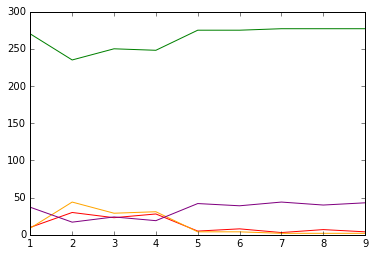

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

def runknn(x,y,x_test,y_test,K):
    knn_current =  KNeighborsClassifier(n_neighbors = K, weights = 'uniform')
    knn_current_model = knn_current.fit(x, y.values.ravel())
    y_hat = knn_current_model.predict(x_test)
    return accuracy_score(y_test,y_hat ), precision_score(y_test,y_hat), recall_score(y_test,y_hat)

def runknn1(x,y,x_test,y_test,K):
    knn_current =  KNeighborsClassifier(n_neighbors = K, weights = 'uniform')
    knn_current_model = knn_current.fit(x, y.values.ravel())
    y_hat = knn_current_model.predict(x_test)
    
    confmat = confusion_matrix(y_true=y_test, y_pred=y_hat)

    confusion = pd.DataFrame(confmat, index=['is_not_spam_email', 'is_spam_email'],
                         columns=['predicted_is_not_spam_email','predicted_is_spam_email'])

    TP = confusion.ix['is_not_spam_email', 'predicted_is_not_spam_email']  

    FP = confusion.ix['is_spam_email', 'predicted_is_not_spam_email']

    TN = confusion.ix['is_spam_email', 'predicted_is_spam_email']

    FN = confusion.ix['is_not_spam_email', 'predicted_is_spam_email']

    #output = zip(['True Positives','False Positives','True Negatives','False Negatives'], [TP, FP, TN, FN])
    
    output = [TP, FP, TN, FN]
    
    return output




print 'K / Accuracy / Precision / Recall'
res = []
K_max = 10
for K in range(1,K_max):
    #acc, prec, recall = runknn(x_train2,y_train2,x_test2,y_test2,K)
    #print K,acc, prec,recall
    res.append(runknn1(x_train2,y_train2,x_test2,y_test2,K))

plt.plot(range(1,K_max),[x[0] for x in res], color = 'red')
plt.plot(range(1,K_max),[x[1] for x in res], color = 'orange')
plt.plot(range(1,K_max),[x[2] for x in res], color = 'green')
plt.plot(range(1,K_max),[x[3] for x in res], color = 'purple')


    

K / Accuracy / Precision / Recall


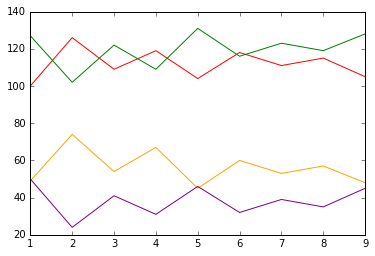

In [114]:



print 'K / Accuracy / Precision / Recall'
res = []
K_max = 10
for K in range(1,K_max):
    #acc, prec, recall = runknn(x_train2,y_train2,x_test2,y_test2,K)
    #print K,acc, prec,recall
    res.append(runknn1(x_train,y_train,x_test,y_test,K))

plt.plot(range(1,K_max),[x[0] for x in res], color = 'red')
plt.plot(range(1,K_max),[x[1] for x in res], color = 'orange')
plt.plot(range(1,K_max),[x[2] for x in res], color = 'green')
plt.plot(range(1,K_max),[x[3] for x in res], color = 'purple')



### 7.  Can you think on any reasons changing this threashold is bad / good?

Find someone you've not talked with much in class then discuss this with them.  Seriously, get out and talk to someone you haven't talked with much.

In [ ]:
[change this cell to markdown type and write some notes here]

### 8. If you were a real-estate agent, and you wanted to minimize false positives, because you would lose money, what would you be trading off in terms of business value?

Discuss this with a few others as well and come up with at least 2 ideas that are actionable and optionally explore one of them through further analysis.

### Challenge #1:  Gridsearch + plot for an optimal value for K with KNN
Plot the value of K from Gridsearch params scored over the range to find an optimal value for K, for score.

> **Optionally**, can you find a configuration that minimizes false positives?  What is the tradeoff if so?

### Challenge #2:  Gridsearch optimal parameters for score for KNN
Can you find optimal parameters for KNN?  K will have the biggest impact, but you might be able to sqeeze a little bit more out using the other parameters.

### Challenge #3: Plot TP, FP, TN, FN in a single plot over a range of K

Manually plot a figure with 4 sub plots, 2x2, which plots the the range of K, by these 4 metrics.  Iterate through a range of K, from 1, 50 by steps of 2, fitting and scoring your classification through confusion matrix.

ASCII prototype:

```
|----------------- figure 1 -------------------|
|                      |                       |
|  [TP line plot #1]   |   [FP line graph #1]  |
|                      |                       |
|----------------------|-----------------------|
|                      |                       |
|  [TN line plot #1]   |   [FN line graph #1]  |
|                      |                       |
------------------------------------------------

```